### Phase 1: Data Retrieval and Understanding

In [1]:
#Load up basic dependencies
import numpy as np
import pandas as pd

In [2]:
#Load the dataset
df = pd.read_csv('https://github.com/dipanjanS/text-analytics-with-python/raw/master/media/Womens%20Clothing%20E-Commerce%20Reviews%20-%20NLP.csv', keep_default_na=False)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#check dataset details
df.shape

(23486, 10)

This dataset includes 23486 rows and 10 columns (features).

Each row corresponds to a customer review, and includes the features:


*   Clothing ID: Integer Categorical variable that refers to the specific    piece being reviewed.
*   Age: Positive Integer variable of the reviewers age.
*   Title: String variable for the title of the review.
*   Review Text: String variable for the review body.
*   Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
*   Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
*   Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
*   Division Name: Categorical name of the product high level division.
*   Department Name: Categorical name of the product department name.
*   Class Name: Categorical name of the product class name.















In [4]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
#1. Basic Data Processing

#Create "Review" column which conbine the "Title" and "Review Text" texts.
df['Review']= df['Title']+df['Review Text']
#Remove 'Title' and 'Review Text' columns
df_new = df.drop(columns = ['Title', 'Review Text'])
#View dataframe
df_new.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu..."
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...


In [6]:
#check any blank reviews(total row of black reviews)
sum(df_new['Review']=='')

844

In [8]:
#2. Remove all the blank Review
df_new['Review'].replace('', np.nan, inplace = True)
df_new.dropna(subset=['Review'], inplace = True)

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22642 non-null  int64 
 1   Age                      22642 non-null  int64 
 2   Rating                   22642 non-null  int64 
 3   Recommended IND          22642 non-null  int64 
 4   Positive Feedback Count  22642 non-null  int64 
 5   Division Name            22642 non-null  object
 6   Department Name          22642 non-null  object
 7   Class Name               22642 non-null  object
 8   Review                   22642 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


### Phase 2:  Exploratory Data Analysis



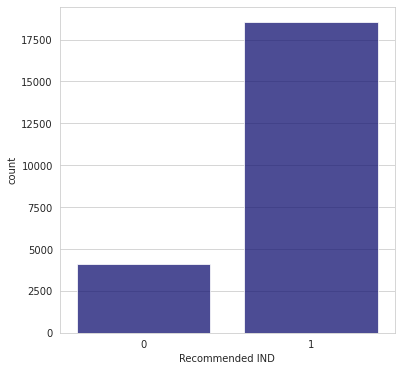

In [10]:
#lookat the number of products recommended and not recommended by customers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize = (6,6))
sns.countplot( data= df_new, x= 'Recommended IND', color ='navy', alpha = 0.75);


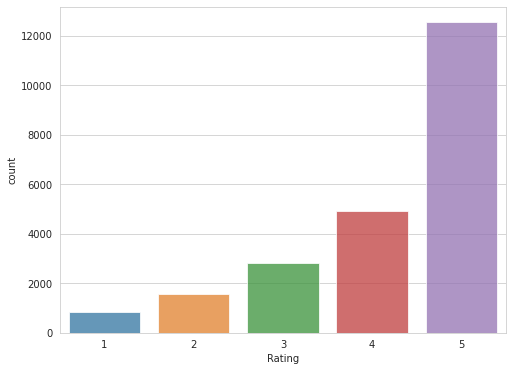

In [11]:
#Show distribution on ratings
plt.figure(figsize = (8,6))
sns.countplot( data= df_new, x= 'Rating',  alpha = 0.75);

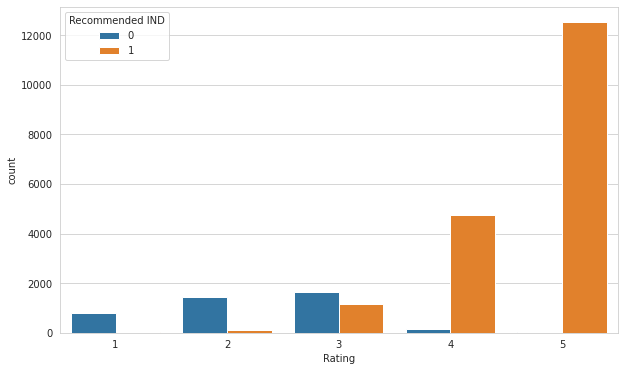

In [12]:
#Ratings vs. Recommendations
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', hue='Recommended IND', data=df_new);

We have to drop the 'Rating' features which indirectly relate very strongly to 'Recommendation', to predict a variable(Recommended) using other features with being an unbiased predictive model. 

In [13]:
#Drop the rating column
df_no_rating = df_new.drop(columns='Rating')
df_no_rating.head(10)

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu..."
4,847,47,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...
5,1080,49,0,4,General,Dresses,Dresses,Not for the very petiteI love tracy reese dres...
6,858,39,1,1,General Petite,Tops,Knits,Cagrcoal shimmer funI aded this in my basket a...
7,858,39,1,4,General Petite,Tops,Knits,"Shimmer, surprisingly goes with lotsI ordered ..."
8,1077,24,1,0,General,Dresses,Dresses,FlatteringI love this dress. i usually get an ...
9,1077,34,1,0,General,Dresses,Dresses,"Such a fun dress!I'm 5""5' and 125 lbs. i order..."


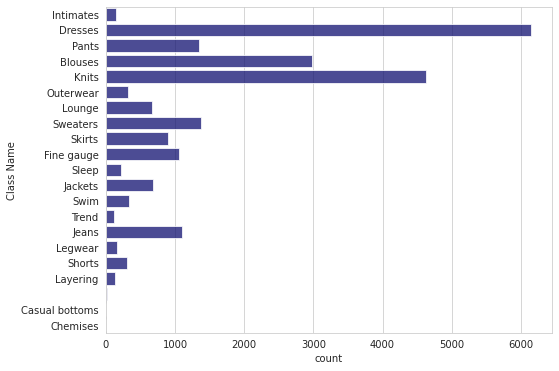

In [14]:
#View the distribution on product class name
plt.figure(figsize = (8,6))
sns.countplot(y = 'Class Name', data= df_no_rating, color='navy', alpha = 0.75);

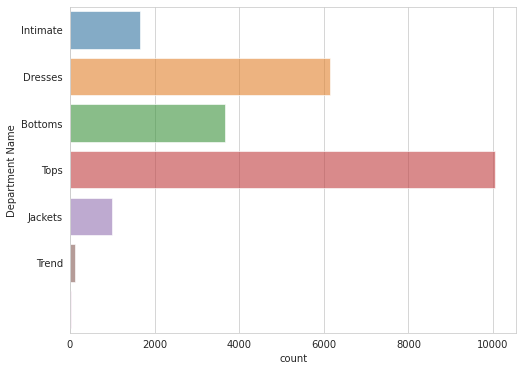

In [15]:
#View the distribituion based on Department Name
plt.figure(figsize=(8,6))
sns.countplot(y = 'Department Name', data=df_no_rating, alpha =0.6);

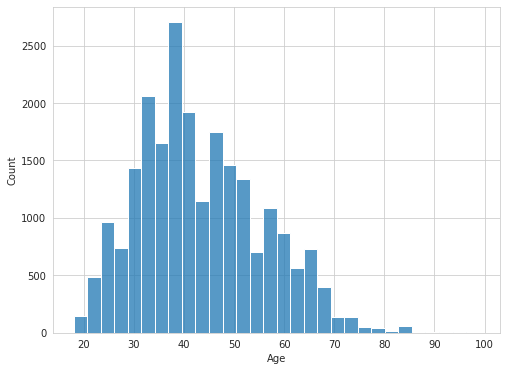

In [16]:
#Viewing histogram distributions for Age on Reviews
plt.figure(figsize= (8,6))
sns.histplot(x = 'Age', bins = 30, data =df_no_rating);

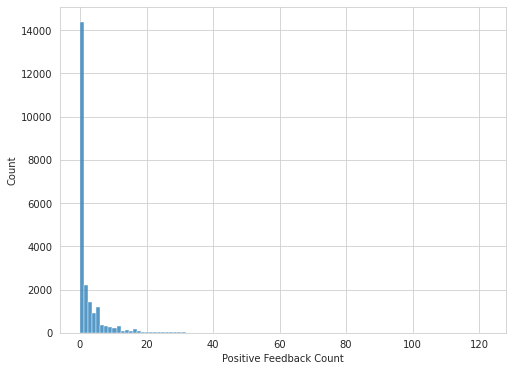

In [17]:
#Viewing histogram distributions for 'Positive Feedback Count' on Reviews
plt.figure(figsize= (8,6))
sns.histplot(x = 'Positive Feedback Count', bins = 100, data =df_no_rating);

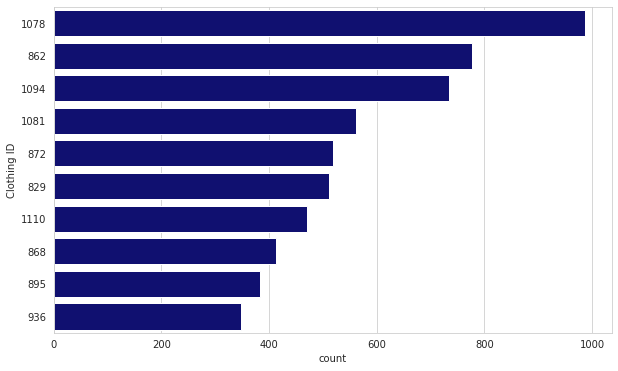

In [18]:
# top 10 product IDs reviewed by customers
plt.figure(figsize=(10, 6))
sns.countplot(y='Clothing ID', data=df_new, color='navy', 
              order=df_no_rating['Clothing ID'].value_counts().iloc[:10].index);

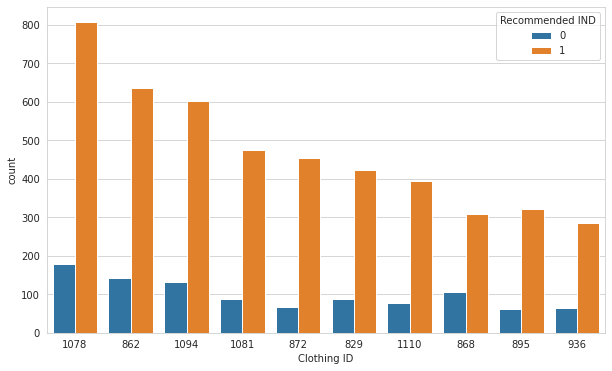

In [19]:
##Top 10 product's recommendation
plt.figure(figsize=(10, 6))
sns.countplot(x='Clothing ID', hue='Recommended IND', data=df_no_rating, 
              order = df_no_rating['Clothing ID'].value_counts().iloc[:10].index);

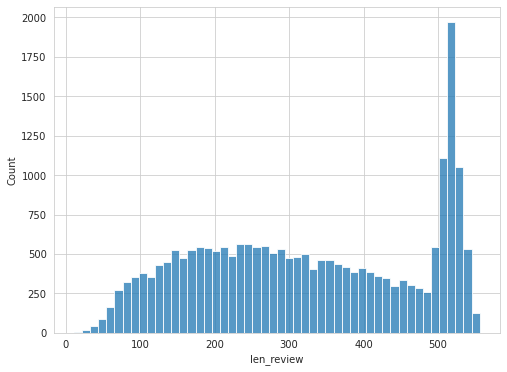

In [20]:
#compute the length of each review and visualize it
feature_col = 'Review'
df_no_rating['len_review']= df_no_rating[feature_col].apply(len)
plt.figure(figsize = (8,6))
sns.histplot(x= 'len_review', data = df_no_rating, bins = 50)

In [21]:
import nltk


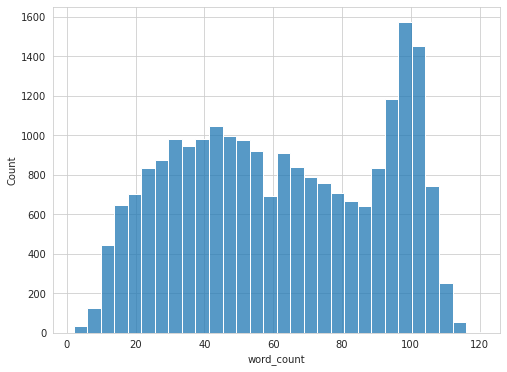

In [22]:
#Words per review + visualize
DF = df_no_rating
default_st = nltk.sent_tokenize
DF['word_count']= DF[feature_col].apply(lambda x: len([word for word in x.split()]))
plt.figure(figsize= (8,6))
sns.histplot( x= 'word_count', bins = 30, data = DF)

# Phase 3: Feature Engineering and Modeling



In [23]:
#view the dataset
DF.head()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,len_review,word_count
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,53,8
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,303,62
2,1077,60,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,523,101
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...",140,24
4,847,47,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,208,37


In [24]:
#subset out unnecessary features
DF = DF[['Review', 'Age', 'Positive Feedback Count', 'Recommended IND']]
DF['Recommended IND'].value_counts() # this shows there is some inbalanced in the database on product recommendations

1    18541
0     4101
Name: Recommended IND, dtype: int64

In [25]:
#Build train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(DF.drop(columns= ['Recommended IND']), DF['Recommended IND'], test_size= 0.3, random_state= 42)
x_train.shape, x_test.shape

((15849, 3), (6793, 3))

In [26]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 2883, 1: 12966}), Counter({0: 1218, 1: 5575}))

In [27]:
x_train.head(3)

,Review,Age,Positive Feedback Count
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,79,8
5333,Wanted to love itThe dresss is much shorter th...,32,3
22502,So cute! though inside not softI got the cream...,34,0


In [28]:
y_train[:3]

4654     1
5333     0
22502    1
Name: Recommended IND, dtype: int64

#Experiment1: Basic NLP Count based Features & Age, Feedback Count


---


*   Word Count: total number of words in the documents
*   Character Count: total number of characters in the documents
*   Average Word Density: average length of the words used in the documents
*   Puncutation Count: total number of punctuation marks in the documents
*   Upper Case Count: total number of upper count words in the documents
*   Title Word Count: total number of proper case (title) words in the documents





In [29]:
import string
feature_col = 'Review'
x_train['char_count'] = x_train[feature_col].apply(len)
x_train['word_count'] = x_train[feature_col].apply(lambda x: len(x.split()))
x_train['word_density'] = x_train['char_count']/x_train['word_count']
x_train['punctuation_count'] = x_train[feature_col].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
x_train['title_word_count'] = x_train[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
x_train['upper_case_word_count'] = x_train[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

x_test['char_count'] = x_test[feature_col].apply(len)
x_test['word_count'] = x_test[feature_col].apply(lambda x: len(x.split()))
x_test['word_density'] = x_test['char_count']/x_test['word_count']
x_test['punctuation_count'] = x_test[feature_col].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
x_test['title_word_count'] = x_test[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
x_test['upper_case_word_count'] = x_test[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


In [30]:
x_train.head()

,Review,Age,Positive Feedback Count,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,79,8,468,94,4.978723,17,1,0
5333,Wanted to love itThe dresss is much shorter th...,32,3,143,25,5.720000,4,1,0
22502,So cute! though inside not softI got the cream...,34,0,450,92,4.891304,14,1,0
392,Lovely fabric but tiny hipsIf your hips are bi...,34,0,395,82,4.817073,6,1,0
372,"So coolThis has great drape, length, the patte...",57,1,291,55,5.290909,10,1,0


Initializing a Logistic Regression Model

In [31]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

#fit model
lr.fit(x_train.drop(columns=['Review']), y_train)
#predict on the test dataframe

lr_predict = lr.predict(x_test.drop(columns=['Review']))

Model Evaluation Metrics 


*   Precision: The positive predictive power of a model. Out of all the predictions made by a model for a class, how many are actually correct
*   Recall: The coverage or hit-rate of a model. Out of all the test data samples belonging to a class, how many was the model able to predict (hit or cover) correctly.
*   F1-score: The harmonic mean of the precision and recall






In [33]:
#evaluate the model performance

print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1218
           1       0.82      1.00      0.90      5575

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.67      0.82      0.74      6793



In [34]:
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_predict), index = lable, columns= lable)

,Negative,Positive
Negative,0,1218
Positive,2,5573


The model gives pretty bad result. So Let's drop some of unseless features.

In [35]:
x_train.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)
x_test.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)

### __Experiment 2: Features from Sentiment Analysis__ + Logit
We will use the lexicon to determind which review might have a positive or negative sentiment because we do not have pre-labled data. 

The general expectation is that highly rated and recommended products (label 1) should have a positive sentiment and products which are not recommended (label 0) should have a negative sentiment.

TextBlob is used to measure the polarity score and subjectivity.


*   The polarity score is a float within the range [-1.0, 1.0]
*   The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.



In [36]:
import textblob
x_train_snt_obj = x_train[feature_col].apply(lambda row: textblob.TextBlob(row).sentiment)
x_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj]
x_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj]

x_test_snt_obj = x_test[feature_col].apply(lambda row: textblob.TextBlob(row).sentiment)
x_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj]
x_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj]

In [37]:
x_train[['Review', 'Polarity', 'Subjectivity']].head()

,Review,Polarity,Subjectivity
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,0.237380,0.641259
5333,Wanted to love itThe dresss is much shorter th...,0.260000,0.400000
22502,So cute! though inside not softI got the cream...,0.208854,0.589583
392,Lovely fabric but tiny hipsIf your hips are bi...,0.114286,0.610440
372,"So coolThis has great drape, length, the patte...",0.314583,0.738889


model Training and Evaluation

In [38]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(x_train.drop(columns= feature_col), y_train)
# predict on the test dataframe
lr_snt_predict = lr.predict(x_test.drop(columns = feature_col))

print(classification_report(y_test, lr_snt_predict))

              precision    recall  f1-score   support

           0       0.64      0.14      0.23      1218
           1       0.84      0.98      0.91      5575

    accuracy                           0.83      6793
   macro avg       0.74      0.56      0.57      6793
weighted avg       0.80      0.83      0.78      6793



In [39]:
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_snt_predict), index = lable, columns= lable)

,Negative,Positive
Negative,168,1050
Positive,95,5480


Based on the indices of precision column of evaluation, this model slightly better than the previous model.

#### __Text Pre-processing and Wrangling__
To use NLP feature engineering like Bag of Words model, we have to clean and pre-process out data. 

Process:
- Text Lowercasing
- Removal of contractions
- Removing unnecessary characters, numbers and symbols
- Stopword removal

In [40]:
!pip install contractions
!pip install textsearch
!pip install tqdm

     |████████████████████████████████| 321 kB 4.2 MB/s 
     |████████████████████████████████| 284 kB 37.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85444 sha256=e836c511019f8f27e954088679cecb73cec8b8710eeba9810f97ab5a33d2d26d
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [41]:
import nltk
import contractions
import re
import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [42]:
# remove some stopwords to capture negation in n-grams later on if possible
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')
stopwords.remove('but')

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        # fix contractions
        doc = contractions.fix(doc)
        # remove special characters and digits
        doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags = re.I|re.A)
        # lower case
        doc = doc.lower()
        # strip whitespaces
        doc = doc.strip()
        # tokenize document
        tokens = nltk.word_tokenize(doc)
        #filter stopwords out of document
        filtered_tokens = [token for token in tokens if token not in stopwords]
        # re-create document from filtered tokens
        filtered_tokens = ' '.join(filtered_tokens)
        # append doc to norm_docs
        norm_docs.append(filtered_tokens)

    return norm_docs


In [43]:
x_train['Clean Review'] = normalize_corpus(x_train[feature_col])
x_test['Clean Review']= normalize_corpus(x_test[feature_col])

100%|██████████| 6793/6793 [00:03<00:00, 2029.99it/s]


In [44]:
#Drop review columns
X_train = x_train[['Clean Review', 'Age', 'Positive Feedback Count', 'Polarity', 'Subjectivity']]
X_test = x_test[['Clean Review', 'Age', 'Positive Feedback Count', 'Polarity', 'Subjectivity']]

In [45]:
X_train.shape

(15849, 5)

In [46]:
#Extracting out the structued features from previous experiments
X_train_struct = X_train.drop(['Clean Review'], axis=1).reset_index(drop=True)
X_test_struct = X_test.drop(['Clean Review'], axis=1).reset_index(drop=True)

X_train_struct.head()

,Age,Positive Feedback Count,Polarity,Subjectivity
0,79,8,0.237380,0.641259
1,32,3,0.260000,0.400000
2,34,0,0.208854,0.589583
3,34,0,0.114286,0.610440
4,57,1,0.314583,0.738889


### __Experiment 3: Modeling based on Bag of Words based Features - 1-grams__


In [47]:
train_clean_text = X_train['Clean Review']
test_clean_text = X_test['Clean Review']

In [48]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range = (1,1))
X_trainCV = cv.fit_transform(train_clean_text)
X_testCV = cv.transform(test_clean_text)
X_trainCV


<15849x20464 sparse matrix of type '<class 'numpy.int64'>'
	with 450364 stored elements in Compressed Sparse Row format>

In [49]:
X_testCV.shape

(6793, 20464)

In [50]:
X_trainCV.shape

(15849, 20464)

Model Training and Evaluation

In [51]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_trainCV, y_train)
#Predict on the test vectors
lr_test_predict = lr.predict(X_testCV)
#Evaluate model performance 
print(confusion_matrix(y_test, lr_test_predict))
print(classification_report(y_test, lr_test_predict))

[[ 787  431]
 [ 266 5309]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      1218
           1       0.92      0.95      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.84      0.80      0.82      6793
weighted avg       0.89      0.90      0.89      6793



In [52]:
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict), index = lable, columns= lable)

,Negative,Positive
Negative,787,431
Positive,266,5309


This result is far better than the previous models.

### __Experiment 4: Modeling with Bag of Words based Features - 2-grams__

Using 1 and 2-grams 

In [53]:

cv = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range = (1,2))
X_traincv2 = cv.fit_transform(train_clean_text)
X_testcv2 = cv.transform(test_clean_text)
X_traincv2


<15849x244141 sparse matrix of type '<class 'numpy.int64'>'
	with 934033 stored elements in Compressed Sparse Row format>

Model Training and Evaluation




In [54]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_traincv2, y_train)
#Predict on the test vectors
lr_test_predict2 = lr.predict(X_testcv2)
#Evaluate model performance 
print(classification_report(y_test, lr_test_predict2))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      1218
           1       0.93      0.96      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.86      0.81      0.83      6793
weighted avg       0.90      0.91      0.90      6793



In [55]:
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict2), index = lable, columns= lable)

,Negative,Positive
Negative,798,420
Positive,204,5371


It produced minor improvements than Unigrams feature.

## __Experiment 5: Adding Bag of Words based Features 1-3-grams__ 

In [56]:
cv = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range = (1,3))
X_traincv3 = cv.fit_transform(train_clean_text)
X_testcv3 = cv.transform(test_clean_text)
X_traincv3

<15849x659859 sparse matrix of type '<class 'numpy.int64'>'
	with 1404315 stored elements in Compressed Sparse Row format>

Model Training and Evaluation






In [57]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_traincv3, y_train)
#Predict on the test vectors
lr_test_predict3 = lr.predict(X_testcv3)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict3), index = lable, columns= lable)

,Negative,Positive
Negative,779,439
Positive,188,5387


In [58]:

print(classification_report(y_test, lr_test_predict3))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71      1218
           1       0.92      0.97      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.87      0.80      0.83      6793
weighted avg       0.90      0.91      0.90      6793



1\~3 grams does not give better result than 1~2 grams' model. There is no improvement of accuracy. 

### __Experiment 6: Adding Bag of Words based Features 1-3-grams with Feature Selection__

Set "min_df" as 3 in CountVectorizer.

In [59]:
cv = CountVectorizer(min_df = 3, max_df = 1.0, ngram_range = (1,3))
X_traincv33 = cv.fit_transform(train_clean_text)
X_testcv33 = cv.transform(test_clean_text)
X_traincv33

<15849x43845 sparse matrix of type '<class 'numpy.int64'>'
	with 744828 stored elements in Compressed Sparse Row format>

Model Training and Evaluation

In [61]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_traincv33, y_train)
#Predict on the test vectors
lr_test_predict33 = lr.predict(X_testcv33)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict33), index = lable, columns= lable)

,Negative,Positive
Negative,822,396
Positive,235,5340


In [62]:
print(classification_report(y_test, lr_test_predict33))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1218
           1       0.93      0.96      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.85      0.82      0.83      6793
weighted avg       0.90      0.91      0.90      6793



This model has improved the accuracy. 


### __Experiment 7: Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features__

Combine our sparse BOW feature matrices with our structured features from earlier.

In [64]:
#This is training data of BOW with 3-grams
X_traincv33

<15849x43845 sparse matrix of type '<class 'numpy.int64'>'
	with 744828 stored elements in Compressed Sparse Row format>

In [65]:
#Converting dense feataures into sparse format
X_train_struct.values

array([[ 7.90000000e+01,  8.00000000e+00,  2.37379630e-01,
         6.41259259e-01],
       [ 3.20000000e+01,  3.00000000e+00,  2.60000000e-01,
         4.00000000e-01],
       [ 3.40000000e+01,  0.00000000e+00,  2.08854167e-01,
         5.89583333e-01],
       ...,
       [ 3.20000000e+01,  0.00000000e+00,  1.10185185e-01,
         4.76851852e-01],
       [ 3.00000000e+01,  1.00000000e+00, -1.85185185e-03,
         3.91666667e-01],
       [ 3.40000000e+01,  9.00000000e+00, -1.84000000e-01,
         6.90000000e-01]])

In [66]:
from scipy import sparse

In [71]:
X_train_sparse = sparse.csr_matrix(X_train_struct)

This enables us to convert dense structured features (Age, Feedback count, polarity, subjectivity) into sparse format__

In [73]:
from scipy.sparse import hstack
X_train_combined = hstack((X_traincv33, X_train_sparse))
X_test_combined = hstack((X_testcv33, X_test_struct))

In [74]:
X_train_combined

<15849x43849 sparse matrix of type '<class 'numpy.float64'>'
	with 800937 stored elements in COOrdinate format>

In [75]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_train_combined, y_train)
#Predict on the test vectors
lr_test_predict_combined = lr.predict(X_test_combined)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict_combined), index = lable, columns= lable)

,Negative,Positive
Negative,827,391
Positive,237,5338


In [76]:
print(classification_report(y_test, lr_test_predict_combined))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1218
           1       0.93      0.96      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.85      0.82      0.83      6793
weighted avg       0.90      0.91      0.91      6793



### __Experiment 8: Combining TF-IDF based Features - 3-grams with Feature Selection and the Structured Features__


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(use_idf = True, min_df =3, max_df = 1.0, ngram_range= (1,3))
X_traintv = tv.fit_transform(train_clean_text)
X_testtv = tv.transform(test_clean_text)

In [78]:
from scipy.sparse import hstack

X_train_combined = hstack((X_traintv, X_train_struct))
X_test_combined = hstack((X_testtv, X_test_struct))

In [79]:
X_train_combined

<15849x43849 sparse matrix of type '<class 'numpy.float64'>'
	with 800937 stored elements in COOrdinate format>

In [80]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_train_combined, y_train)
#Predict on the test vectors
lr_test_predict_combined = lr.predict(X_test_combined)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict_combined), index = lable, columns= lable)

,Negative,Positive
Negative,682,536
Positive,137,5438


In [81]:
print(classification_report(y_test, lr_test_predict_combined))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67      1218
           1       0.91      0.98      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.87      0.77      0.81      6793
weighted avg       0.90      0.90      0.89      6793



### Initial Model Performance Evaluation and recommendations
Based on the observation of using 8 different models, "Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured" model performed best. The model gives highest score of f1 and precision. Total of 43345 features has been used to produce the result. 

##  __Try out some more complex classification models__

With the best combination of experiemts, below classification models will be used to see any one of model could create better result.
- Random Forest



Random Forest

In [82]:
cv = CountVectorizer(min_df = 3, max_df = 1.0, ngram_range = (1,3))
X_traincv33 = cv.fit_transform(train_clean_text)
X_testcv33 = cv.transform(test_clean_text)


In [83]:
from scipy.sparse import hstack
X_train_combined_RF = hstack((X_traincv33, X_train_struct))
X_test_combined_RF = hstack((X_testcv33, X_test_struct))

In [84]:
#fit model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=42)
rf.fit(X_train_combined_RF, y_train)

#Predict model
rf_predictions = rf.predict(X_test_combined_RF)

In [85]:
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, rf_predictions), index = lable, columns= lable)

,Negative,Positive
Negative,361,857
Positive,41,5534


In [86]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.30      0.45      1218
           1       0.87      0.99      0.92      5575

    accuracy                           0.87      6793
   macro avg       0.88      0.64      0.69      6793
weighted avg       0.87      0.87      0.84      6793



No improvement of using RandomForest

# ___Phase 4: Evaluation, Insights, Recommendations and Report___

By comparing the score of averaged metrics, the per-class performance metrics, and total features being used for each experiments, the method from experiments 7, "Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features" produces the best performance. 

In [87]:
#use the method from experiments 7 to rebuild the model
#BOW vetorization with feataure selection
cv = CountVectorizer(min_df = 3, max_df = 1.0, ngram_range = (1,3))
X_traincv33 = cv.fit_transform(train_clean_text)
X_testcv33 = cv.transform(test_clean_text)
X_train_sparse = sparse.csr_matrix(X_train_struct)

#conbine BOW features with structured features
X_train_combined = hstack((X_traincv33, X_train_sparse))
X_test_combined = hstack((X_testcv33, X_test_struct))

#Train and evaluate Logistic regrassion model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_train_combined, y_train)
lr_test_predict_combined = lr.predict(X_test_combined)
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict_combined), index = lable, columns= lable)
print(classification_report(y_test, lr_test_predict_combined))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1218
           1       0.93      0.96      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.85      0.82      0.83      6793
weighted avg       0.90      0.91      0.91      6793



In [88]:
#Get the actual feature names of the features
features_names = np.array(X_train_struct.columns.tolist() + cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [89]:
features_names

array(['Age', 'Positive Feedback Count', 'Polarity', ..., 'zips', 'zone',
       'zoom'], dtype='<U32')

In [102]:
#get top 20 feature indices with negative coefficients 
fs1 = np.argsort(features_names)[:20]
fs1
#get top 20 feature indices with positive coefficients 
#fs2 = np.argsort(-features_names)[:20]

array([ 0,  2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [103]:
#print top 20 featurees
top20_neg_feataures = features_names[fs1]
top20_neg_feataures

array(['Age', 'Polarity', 'Positive Feedback Count', 'Subjectivity', 'aa',
       'aa waist', 'ab', 'abdomen', 'ability', 'able', 'able bend',
       'able button', 'able buy', 'able dress', 'able find', 'able fit',
       'able fix', 'able get', 'able get away', 'able get sale'],
      dtype='<U32')

In [105]:
#Print smaple reveiws for each of the 20 features
print(('this features are from the structured features', top20_neg_feataures[:4]))

('this features are from the structured features', array(['Age', 'Polarity', 'Positive Feedback Count', 'Subjectivity'],
      dtype='<U32'))


In [106]:
x_train.head()

,Review,Age,Positive Feedback Count,Polarity,Subjectivity,Clean Review
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,79,8,0.237380,0.641259,sexy flowsi love jumpsuit usually size small h...
5333,Wanted to love itThe dresss is much shorter th...,32,3,0.260000,0.400000,wanted love itthe dresss much shorter describe...
22502,So cute! though inside not softI got the cream...,34,0,0.208854,0.589583,cute though inside not softi got cream color a...
392,Lovely fabric but tiny hipsIf your hips are bi...,34,0,0.114286,0.610440,lovely fabric but tiny hipsif hips bigger size...
372,"So coolThis has great drape, length, the patte...",57,1,0.314583,0.738889,coolthis great drape length pattern super vers...


## __Final Report__

The NLP problem was derived from the data from an e-commerce store focusing on women's clothing. The data set initially contained various features for example, reviews, rating of the products, recommendation and etc. The main object of this report is to find a right supervised predictive model to predict if the produc is recommended by the customer or not. 

Based on the observation of experiments, we found that the model, "Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features" produces the best performance. Using the model, we can predict the product is recommended by customer or not accuratly. 


